In [1]:
import pandas as pd
import numpy as np
import fundamentalanalysis as fa

%matplotlib inline
import matplotlib.pyplot as plt


#ExportCharts
from PIL import Image
import glob
import os



ticker = "MSFT"
api_key = "f1ae8ba37c1321bd179bbe33dbddc3ef"


# FUNCTIONS  

In [2]:

def ExportCharts():
    images = glob.glob("IMG\*.png")
    print(images)
    imlist = []
    for img in images:
        im = Image.open(img)
        im = im.convert('RGB')
        imlist.append(im)
    imlist[0].save('{} plots.pdf'.format(ticker)  ,save_all=True, append_images=imlist[1:]) # TKR to filename on save
    map(os.remove(img),[img for img in images])

# FA · Key Metrics Annually


* BVPS
* ROIC  
* ROE

In [3]:
key_metrics = fa.key_metrics(ticker, api_key, period="annual",  limit = 12)
key_metrics

,2022,2021,2020,2019,2018
period,FY,FY,FY,FY,FY
revenuePerShare,26.450107,22.272161,18.793035,16.400756,14.332468
netIncomePerShare,9.703575,8.11859,5.818791,5.114036,2.152078
operatingCashFlowPerShare,11.877668,10.168279,7.973062,6.801121,5.699221
freeCashFlowPerShare,8.691169,7.435802,5.944021,4.986316,4.188571
cashPerShare,13.973986,17.269644,17.940473,17.440245,17.372468
bookValuePerShare,22.217449,18.813833,15.545861,13.336374,10.742597
tangibleBookValuePerShare,11.702241,11.193454,8.924442,6.849212,5.062597
shareholdersEquityPerShare,22.217449,18.813833,15.545861,13.336374,10.742597
interestDebtPerShare,8.448906,9.291242,9.670039,10.563274,10.979351


### Key Metrics TTM

In [4]:
key_metrics_TTM = fa.key_metrics(ticker, api_key, TTM=True,  limit = 12)
key_metrics_TTM

revenuePerShareTTM                           2.723280e+01
netIncomePerShareTTM                         9.358857e+00
operatingCashFlowPerShareTTM                 1.175982e+01
freeCashFlowPerShareTTM                      8.493228e+00
cashPerShareTTM                              1.438165e+01
bookValuePerShareTTM                         2.327558e+01
tangibleBookValuePerShareTTM                 1.277980e+01
shareholdersEquityPerShareTTM                2.327558e+01
interestDebtPerShareTTM                      8.355371e+00
marketCapTTM                                 1.830097e+12
enterpriseValueTTM                           1.867495e+12
peRatioTTM                                   2.642000e+01
priceToSalesRatioTTM                         9.011926e+00
pocfratioTTM                                 2.086936e+01
pfcfRatioTTM                                 2.889596e+01
pbRatioTTM                                   1.054410e+01
ptbRatioTTM                                  1.054410e+01
evToSalesTTM  

In [5]:
DtE_TTM = key_metrics_TTM.loc['debtToEquityTTM']
DtE_TTM.round(2)

1.07

### ROE

In [6]:
# 5yr
ROE_5yr = key_metrics.loc['roe'].iloc[::-1] # reverse date
ROE_5yr = ROE_5yr * 100
ROE_5yr

2018    20.033125
2019    38.346526
2020    37.429842
2021    43.152238
2022    43.675469
Name: roe, dtype: object

In [7]:
# ROE mean
ROE_mean = ROE_5yr.mean()
ROE_mean = ROE_mean.round(2)
ROE_mean 

36.53

In [8]:
# ROE Current
ROE_current = float(key_metrics.loc['roe'].iloc[0] * 100)
ROE_current = ROE_current.__round__(2)
ROE_current

43.68

In [9]:
# ROE TTM
ROE_ttm = key_metrics_TTM.loc['roeTTM'] * 100
ROE_ttm = ROE_ttm.round(2)
ROE_ttm

42.1

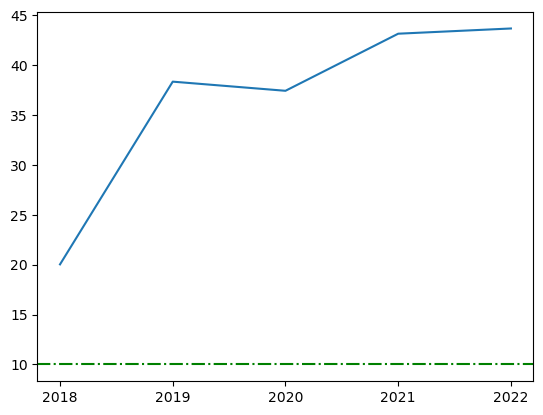

In [10]:
plt.plot(ROE_5yr)
plt.axhline(y=10, color='g', linestyle='-.')

In [11]:
df_ROE = pd.DataFrame([[ROE_current ,ROE_ttm, ROE_mean]],columns=['Now','ttm','5 yr avg'])

df_ROE

,Now,ttm,5 yr avg
0,43.68,42.1,36.53


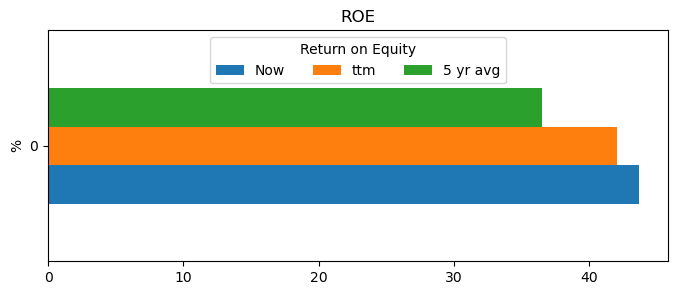

In [12]:
df_ROE.plot(figsize=(8,3), kind='barh',  title='ROE', ylabel='%').legend(
    loc='upper center', ncol=3, title="Return on Equity")


### BVPS

In [13]:
BVPS_2022 = key_metrics.loc['bookValuePerShare', '2022'] 
BVPS_2022

22.217449306296693

###     ROIC
Only 5 yrs data

In [14]:
# ROIC 2022 
key_metrics.loc['roic', '2022']
roic_current = key_metrics.loc['roic', '2022'] 
round(roic_current * 100, 2)


30.91

In [15]:
# ROIC 5 YR
roic_5yr = key_metrics.loc['roic']*100

roic_5yr =  roic_5yr.iloc[::-1] # reverse date
roic_5yr

2018    17.497504
2019    19.784375
2020      23.1261
2021     28.52294
2022    30.910297
Name: roic, dtype: object

In [16]:
round(roic_5yr.mean(), 2)   # average

23.97

In [17]:

print(roic_5yr.pct_change()*100)

2018          NaN
2019    13.069694
2020    16.890729
2021    23.336575
2022     8.369957
Name: roic, dtype: float64


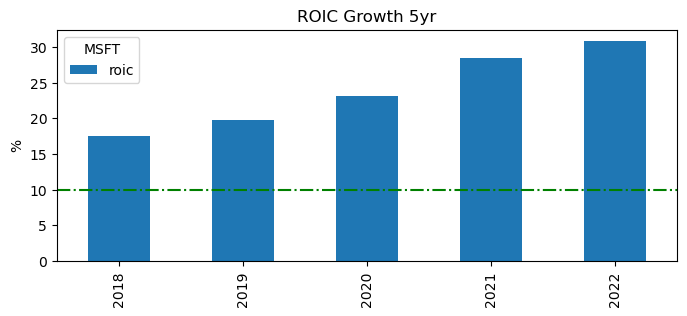

In [18]:
# ROIC Chart

roic_5yr.plot(figsize=(8,3), kind='bar',  title='ROIC Growth 5yr', ylabel='%').legend(
    loc='upper left', ncol=3, title=ticker,  )
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line
plt.savefig('IMG\RoicGrowth.png') # prep for export


# FA ·   Financial RATIOS Annually  
https://site.financialmodelingprep.com/developer/docs/#Company-Financial-Ratios


* PE :  price / (netIncome / shareNumber)
*


In [19]:
# ratios_annually = fa.ratios
financial_ratios = fa.ratios.financial_ratios(ticker, api_key)
type(financial_ratios)
financial_ratios

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
currentRatio,1.784607,2.079994,2.515765,2.528839,2.9008,2.477273,2.352882,2.501344,2.504022,2.711762,...,3.232577,4.172235,4.722892,5.062167,3.959946,3.505453,3.853854,2.952771,2.923729,4.346939
quickRatio,1.567174,1.899196,2.33077,2.352967,2.739861,2.367583,2.215695,2.295198,2.306915,2.525804,...,1.336082,1.887899,2.138007,2.399645,3.614008,2.251193,2.287473,1.911839,2.347458,3.816327
cashRatio,0.146516,0.160439,0.187747,0.163584,0.204247,0.118756,0.109675,0.112219,0.190005,0.101665,...,1.072577,1.45657,1.617744,1.79929,1.770866,1.42195,1.318522,1.211587,1.550847,2.693878
daysOfSalesOutstanding,81.481137,82.609675,81.697829,85.632574,87.58214,80.312173,78.189229,69.848472,82.152638,81.984226,...,26.898282,35.719218,37.292966,32.872369,108.982673,48.174297,55.826432,50.514001,58.054146,58.020231
daysOfInventoryOutstanding,21.800958,18.420509,15.01096,17.548241,25.333872,23.235311,25.064521,32.06096,36.047375,34.933577,...,0.0,52.828947,70.779468,96.172199,88.544197,59.942469,98.323643,76.65,133.175676,83.851351
operatingCycle,103.282095,101.030183,96.708789,103.180814,112.916012,103.547485,103.25375,101.909432,118.200013,116.917803,...,26.898282,88.548166,108.072434,129.044568,197.52687,108.116766,154.150076,127.164001,191.229821,141.871583
daysOfPayablesOutstanding,110.694334,105.959852,99.254525,79.804941,82.006753,78.729459,76.808115,72.816605,100.715824,87.027508,...,416.553672,337.985197,224.828897,180.985477,193.271675,109.321827,90.188953,85.166667,106.047297,103.581081
cashConversionCycle,-7.412239,-4.929669,-2.545736,23.375874,30.909259,24.818026,26.445635,29.092827,17.484189,29.890295,...,-389.655391,-249.437032,-116.756463,-51.940909,4.255195,-1.205061,63.961122,41.997335,85.182524,38.290501
grossProfitMargin,0.684017,0.689258,0.67781,0.65902,0.652474,0.619111,0.615799,0.646954,0.689818,0.739894,...,0.918349,0.897591,0.886857,0.871569,0.871642,0.844418,0.825587,0.77598,0.749577,0.786127


In [20]:
# PE
priceEarningsRatio = financial_ratios.loc['priceEarningsRatio']
type(priceEarningsRatio)
priceEarningsRatio = priceEarningsRatio.iloc[::-1] # reverse date


<AxesSubplot:title={'center':'PE Ratio'}>

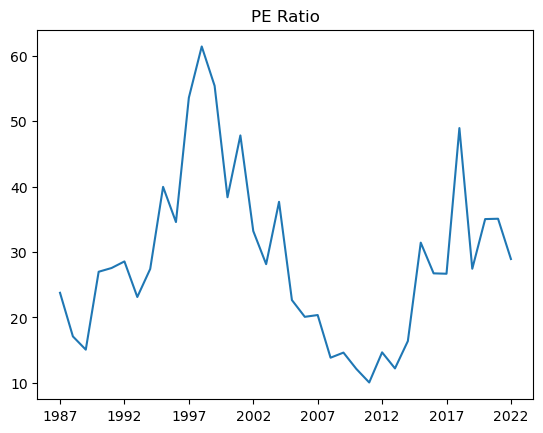

In [21]:
priceEarningsRatio.plot( title='PE Ratio')

In [22]:
# PE current
priceEarningsRatio_current = financial_ratios.loc['priceEarningsRatio'].head(1)  # pull from dataframe
type(priceEarningsRatio_current)
PE = priceEarningsRatio_current[0]
PE = round(PE,2)
PE


28.93

# FA · GROWTH       
https://site.financialmodelingprep.com/developer/docs/financial-statements-growth-api/

Financial Statements Growth
* CAGR  
  * Revenue
  * EPS
* BVPS 
* EPS growth
* Operating Cash Flow Growth
* Free Cash Flow Growth
* Revenue Growth


In [23]:
growth_all = fa.financial_statement_growth(ticker, api_key, period="annual") 
growth_all


,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenueGrowth,0.179561,0.175317,0.136456,0.140295,0.226904,0.054266,-0.088267,0.077701,0.115403,0.055966,...,0.277049,0.238742,0.360423,0.496528,0.557715,0.472806,0.36002,0.708008,0.751392,0
grossProfitGrowth,0.170591,0.195168,0.168859,0.151735,0.29302,0.059935,-0.132173,0.010735,0.039913,0.025039,...,0.292505,0.260471,0.360309,0.544777,0.593245,0.566961,0.35898,0.640916,0.721675,0
ebitgrowth,0.192617,0.320191,0.23278,0.225369,0.570277,0.106233,0.111282,-0.345762,0.037177,0.229794,...,0.180765,0.301659,0.331325,0.532779,0.652594,0.623452,0.292423,0.476753,1.083744,0
operatingIncomeGrowth,0.192617,0.320191,0.23278,0.225369,0.570277,0.106233,0.111282,-0.345762,0.037177,0.229794,...,0.180765,0.301659,0.331325,0.532779,0.652594,0.623452,0.292423,0.476753,1.083744,0
netIncomeGrowth,0.187152,0.383686,0.128466,1.367992,-0.218497,0.262293,0.377676,-0.447631,0.009651,0.287725,...,0.267888,0.202518,0.345855,0.530365,0.657235,0.637537,0.37611,0.723227,0.829517,0
epsgrowth,0.194581,0.395189,0.138943,1.376744,-0.215328,0.292453,0.422819,-0.43985,0.019157,0.292079,...,0.234043,0.175,0.25,0.454545,0.571429,0.4,0.25,1,0.868295,0
epsdilutedGrowth,0.198758,0.397569,0.13834,1.375587,-0.214022,0.290476,0.418919,-0.437262,0.01938,0.29,...,0.234043,0.175,0.25,0.454545,0.571429,0.4,0.25,1,0.868295,0
weightedAverageSharesGrowth,-0.006758,-0.008279,-0.008211,-0.003506,-0.005939,-0.022587,-0.030818,-0.014701,-0.009075,-0.002501,...,0.027869,0.024134,0.076684,0.052126,0.054604,0.169669,0.100888,-0.138387,-0.020756,0
weightedAverageSharesDilutedGrowth,-0.008938,-0.009762,-0.009029,-0.00526,-0.004852,-0.022588,-0.029198,-0.017264,-0.008383,-0.004232,...,0.027869,0.024134,0.076684,0.052126,0.054604,0.169669,0.100888,-0.138387,-0.020756,0


 CAGR    

In [24]:

head = 10
revenueGrowth = pd.DataFrame( growth_all.loc['revenueGrowth'].head(head).iloc[::-1] ) # reverse date
revenueGrowth *= 100
revenueGrowthCagrMin = revenueGrowth.min()
revenueGrowthCagrMax = revenueGrowth.max()
print(revenueGrowthCagrMin, revenueGrowthCagrMax)

cagrRev = np.power

revenueGrowth   -8.826672
dtype: object revenueGrowth    22.690384
dtype: object


In [25]:
BVPS_growth = growth_all.loc['bookValueperShareGrowth'].head(10).iloc[::-1] # reverse date
BVPS_growth = BVPS_growth*100
BVPS_growth

2013    19.256135
2014    14.772773
2015    -9.474038
2016     -7.23828
2017     2.875024
2018    14.943448
2019    24.144784
2020     16.56737
2021    21.021497
2022    18.091029
Name: bookValueperShareGrowth, dtype: object

Text(0.5, 1.0, 'BVPS Growth 10yrs')

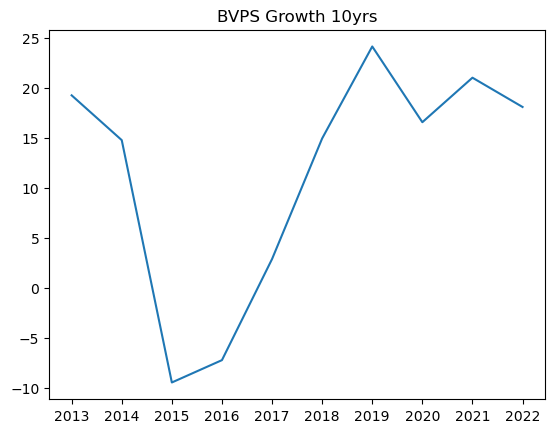

In [26]:
plt.plot(BVPS_growth)
plt.title('BVPS Growth 10yrs')

GROWTH EPS

In [27]:
growth_EPS = growth_all.loc['epsgrowth']
growth_EPS_10yr = growth_EPS.head(10)*100
# round(growth_EPS_5yr,2)
growth_EPS_10yr = growth_EPS_10yr.iloc[::-1] # reverse date
growth_EPS_10yr

2013     29.207921
2014      1.915709
2015    -43.984962
2016     42.281879
2017     29.245283
2018    -21.532847
2019    137.674419
2020     13.894325
2021       39.5189
2022     19.458128
Name: epsgrowth, dtype: object

In [28]:

round(growth_EPS.mean(),2)*100

27.0

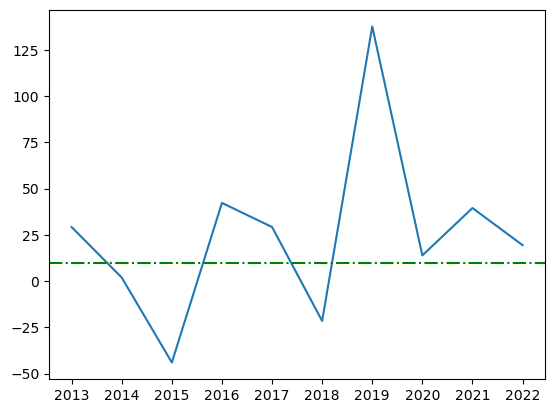

In [29]:
# growth_EPS_5yr_Rev = growth_EPS_5yr.iloc[::-1] # reverse date
plt.plot(growth_EPS_10yr)
plt.axhline(y=10, color='g', linestyle='-.')

### OPERATING CASH FLOW GROWTH

In [30]:
operatingCashFlowGrowth_5yr = growth_all.loc['operatingCashFlowGrowth'].head()*100
# OCFGrowth = round(operatingCashFlowGrowth_5yr,2)
operatingCashFlowGrowth_5yr

2022    16.021631
2021    26.477132
2020    16.269043
2019    18.915778
2018    11.079049
Name: operatingCashFlowGrowth, dtype: object

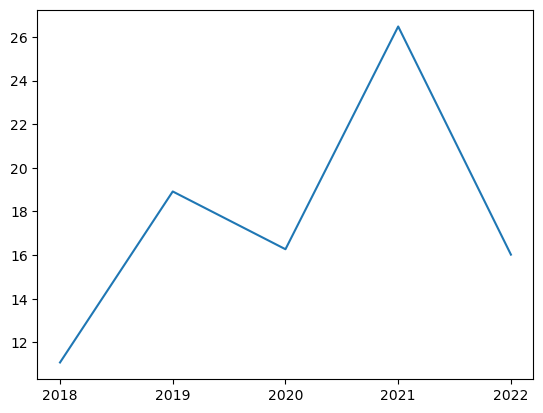

In [31]:
operatingCashFlowGrowth_5yr_Rev = operatingCashFlowGrowth_5yr .iloc[::-1] # reverse date
plt.plot(operatingCashFlowGrowth_5yr_Rev)

### Free Cash Flow Growth

In [32]:
freeCashFlowGrowth_10yr = growth_all.loc['freeCashFlowGrowth'].head(10)*100
freeCashFlowGrowth_10yr

2022    16.092876
2021    24.061547
2020    18.227914
2019    18.628302
2018     2.785391
2017    25.602434
2016     7.978907
2015   -13.497345
2014     8.829753
2013   -16.182941
Name: freeCashFlowGrowth, dtype: object

Text(0.5, 1.0, 'FCF Growth %')

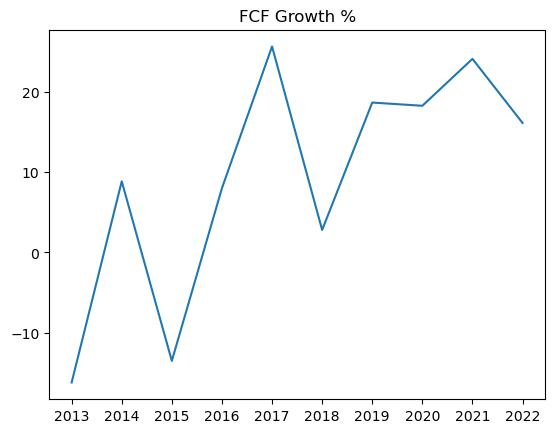

In [33]:
freeCashFlowGrowth_10yr_Rev = freeCashFlowGrowth_10yr.iloc[::-1] # reverse date
plt.plot(freeCashFlowGrowth_10yr_Rev)
plt.title('FCF Growth %')

### Revenue Growth   
revenueGrowth

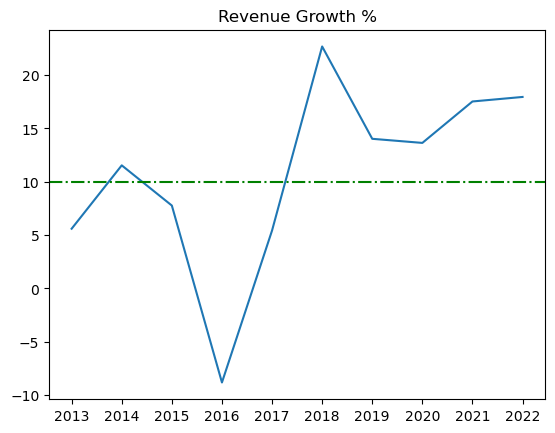

In [34]:
revenueGrowth = growth_all.loc['revenueGrowth'].head(10)*100
revenueGrowth
revenueGrowth = revenueGrowth.iloc[::-1] # reverse date
plt.plot(revenueGrowth)
plt.title('Revenue Growth %')
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line

In [35]:
abc = 5.6 **10
abc

30330548.909611396

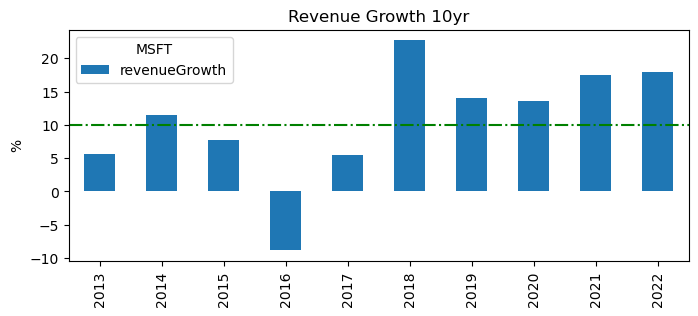

In [36]:
revenueGrowth.plot(figsize=(8,3), kind='bar',  title='Revenue Growth 10yr', ylabel='%').legend(
    loc='upper left', ncol=3, title=ticker,  )
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line
plt.savefig('IMG\\revenueGrowth.png') # prep for export


### Operating Income Growth   
operatingIncomeGrowth

In [37]:
operatingIncomeGrowth = growth_all.loc['operatingIncomeGrowth'].head(10)*100
operatingIncomeGrowth


2022    19.261685
2021    32.019109
2020    23.278009
2019    22.536939
2018    57.027681
2017    10.623328
2016    11.128242
2015   -34.576173
2014      3.71768
2013    22.979369
Name: operatingIncomeGrowth, dtype: object

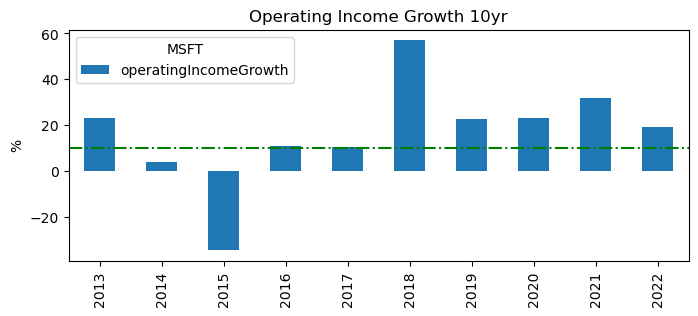

In [38]:

operatingIncomeGrowth = operatingIncomeGrowth.iloc[::-1] # reverse date

operatingIncomeGrowth.plot(figsize=(8,3), kind='bar',  title='Operating Income Growth 10yr', ylabel='%').legend(
    loc='upper left', ncol=3, title=ticker,  )
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line
plt.savefig('IMG\operatingIncomeGrowth.png') # prep for export


In [39]:
ExportCharts()

['IMG\\imagename01.png', 'IMG\\operatingIncomeGrowth.png', 'IMG\\revenueGrowth.png', 'IMG\\RoicGrowth.png']


### Company Financial Statements  
https://site.financialmodelingprep.com/developer/docs/#Company-Financial-Statements  

* Annual income statements

In [40]:
incomeStatement = fa.income_statement(ticker, api_key, period="annual")
incomeStatement

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,...,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019
fillingDate,2022-07-28,2021-07-29,2020-07-30,2019-08-01,2018-08-03,2017-08-02,2016-07-28,2015-07-31,2014-07-31,2013-07-30,...,1995-09-25,1994-09-27,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30,1988-06-30,1987-06-30,1986-06-30
acceptedDate,2022-07-28 16:06:19,2021-07-29 16:21:55,2020-07-30 20:44:46,2019-08-01 16:09:55,2018-08-03 11:03:33,2017-08-02 16:15:01,2016-07-28 16:12:18,2015-07-31 15:07:52,2014-07-31 17:16:52,2013-07-30 16:14:49,...,1995-09-25 00:00:00,1994-09-27 00:00:00,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30,1988-06-30,1987-06-30,1986-06-30
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenue,198270000000,168088000000,143015000000,125843000000,110360000000,89950000000,85320000000,93580000000,86833000000,77849000000,...,5937000000,4649000000,3753000000,2758700000,1843400000,1183400000,803500000,590800000,345900000,197500000
costOfRevenue,62650000000,52232000000,46078000000,42910000000,38353000000,34261000000,32780000000,33038000000,26934000000,20249000000,...,608000000,526000000,482000000,354100000,286800000,206400000,180000000,132000000,66300000,35100000
grossProfit,135620000000,115856000000,96937000000,82933000000,72007000000,55689000000,52540000000,60542000000,59899000000,57600000000,...,5329000000,4123000000,3271000000,2404600000,1556600000,977000000,623500000,458800000,279600000,162400000
grossProfitRatio,0.684017,0.689258,0.67781,0.65902,0.652474,0.619111,0.615799,0.646954,0.689818,0.739894,...,0.897591,0.886857,0.871569,0.871642,0.844418,0.825587,0.77598,0.776574,0.808326,0.822278


### Balance Sheet Statements
https://site.financialmodelingprep.com/developer/docs#Company-Financial-Statements

* Equity

In [41]:
balanceSheetStatement = fa.balance_sheet_statement(ticker, api_key)
balanceSheetStatement

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,...,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019
fillingDate,2022-07-28,2021-07-29,2020-07-30,2019-08-01,2018-08-03,2017-08-02,2016-07-28,2015-07-31,2014-07-31,2013-07-30,...,1995-09-25,1994-09-27,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30,1988-06-30,1987-06-30,1986-06-30
acceptedDate,2022-07-28 16:06:19,2021-07-29 16:21:55,2020-07-30 20:44:46,2019-08-01 16:09:55,2018-08-03 11:03:33,2017-08-02 16:15:01,2016-07-28 16:12:18,2015-07-31 15:07:52,2014-07-31 17:16:52,2013-07-30 16:14:49,...,1995-09-25 00:00:00,1994-09-27 00:00:00,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30,1988-06-30,1987-06-30,1986-06-30
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
cashAndCashEquivalents,13931000000,14224000000,13576000000,11356000000,11946000000,7663000000,6510000000,5595000000,8669000000,3804000000,...,1962000000,1477000000,1013000000,791400000,417200000,246300000,192400000,183200000,132500000,102700000
shortTermInvestments,90818000000,116110000000,122951000000,122463000000,121822000000,125318000000,106730000000,90931000000,77040000000,73218000000,...,0,0,0,0,0,0,0,0,0,0
cashAndShortTermInvestments,104749000000,130334000000,136527000000,133819000000,133768000000,132981000000,113240000000,96526000000,85709000000,77022000000,...,1962000000,1477000000,1013000000,791400000,417200000,246300000,192400000,183200000,132500000,102700000
netReceivables,44261000000,38043000000,32011000000,29524000000,26481000000,19792000000,18277000000,17908000000,19544000000,17486000000,...,581000000,475000000,338000000,823700000,243300000,181000000,111200000,93600000,55100000,34500000


### Cash Flow Statement
https://site.financialmodelingprep.com/developer/docs/#Company-Financial-Statements

* Free Cash Flow


In [42]:
cashFlowStatement = fa.cash_flow_statement(ticker, api_key)
cashFlowStatement

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,...,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019
fillingDate,2022-07-28,2021-07-29,2020-07-30,2019-08-01,2018-08-03,2017-08-02,2016-07-28,2015-07-31,2014-07-31,2013-07-30,...,1998-06-30,1997-09-29,1996-09-27,1995-09-25,1994-09-27,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30
acceptedDate,2022-07-28 16:06:19,2021-07-29 16:21:55,2020-07-30 20:44:46,2019-08-01 16:09:55,2018-08-03 11:03:33,2017-08-02 16:15:01,2016-07-28 16:12:18,2015-07-31 15:07:52,2014-07-31 17:16:52,2013-07-30 16:14:49,...,1998-06-30,1997-09-29 00:00:00,1996-09-27 00:00:00,1995-09-25 00:00:00,1994-09-27 00:00:00,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
netIncome,72738000000,61271000000,44281000000,39240000000,16571000000,21204000000,16798000000,12193000000,22074000000,21863000000,...,4490000000,3454000000,2195000000,1453000000,1146000000,953000000,708100000,462700000,279200000,170500000
depreciationAndAmortization,14460000000,11686000000,12796000000,11682000000,10261000000,8778000000,6622000000,5957000000,5212000000,3755000000,...,1024000000,557000000,480000000,269000000,237000000,151000000,112300000,75800000,46300000,24200000
deferredIncomeTax,-5702000000,-150000000,-3620000000,-3534000000,13040000000,-3296000000,332000000,224000000,-331000000,-19000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stockBasedCompensation,7502000000,6118000000,5289000000,4652000000,3940000000,3266000000,2668000000,2574000000,2446000000,2406000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CAGR

* Revenue
* EPS
* Equity
* FCF

In [43]:
dic_cagr = {}

head = 10

In [44]:
# CAGR REVENUE  
CagrRevenue = pd.DataFrame(incomeStatement.loc['revenue'].head(head).iloc[::-1] ) # reverse date

revenueCagrFirst = CagrRevenue.iloc[0]
revenueCagrLast = CagrRevenue.iloc[-1]

cagrRevenue10yr = (revenueCagrLast - revenueCagrFirst)**(1/head)-1
cagrRevenue10yr = cagrRevenue10yr[0]
cagrRevenue10yr = round(cagrRevenue10yr, 2)

print ('{} 10 yr CAGR Revenue of {}% '.format(ticker , cagrRevenue10yr))


MSFT 10 yr CAGR Revenue of 11.83% 


In [45]:

dic_cagr['Revenue'] = cagrRevenue10yr
dic_cagr

{'Revenue': 11.83}

In [46]:
# CAGR EPS  
CagrEPS = pd.DataFrame(incomeStatement.loc['eps'].head(head).iloc[::-1] ) # reverse date
CagrEPS

EpsCagrFirst = CagrEPS.iloc[0]
EpsCagrLast = CagrEPS.iloc[-1]

cagrEps10yr = (EpsCagrLast - EpsCagrFirst)**(1/head)-1
cagrEps10yr = cagrEps10yr[0]
cagrEps10yr = round(cagrEps10yr, 2)*100

print ('{} 10 yr CAGR EPS of {}% '.format(ticker , cagrEps10yr))

dic_cagr['EPS'] = cagrEps10yr
dic_cagr

MSFT 10 yr CAGR EPS of 22.0% 


{'Revenue': 11.83, 'EPS': 22.0}

In [47]:
# CAGR EQUITY 
cagrFCF = pd.DataFrame(balanceSheetStatement.loc['totalEquity'].head(head).iloc[::-1] ) # fa. , reverse date
cagrFCF

EquityCagrFirst = cagrFCF.iloc[0]
EquityCagrLast = cagrFCF.iloc[-1]

EquityEps10yr = (EquityCagrLast - EquityCagrFirst)**(1/head)-1
EquityEps10yr = EquityEps10yr[0]
EquityEps10yr = round(EquityEps10yr, 2)#*100

print ('{} 10 yr CAGR Equity of {}% '.format(ticker , EquityEps10yr))

dic_cagr['Equity'] = EquityEps10yr
dic_cagr


MSFT 10 yr CAGR Equity of 11.42% 


{'Revenue': 11.83, 'EPS': 22.0, 'Equity': 11.42}

In [48]:
# CAGR FCF 
cagrFCF = pd.DataFrame(cashFlowStatement.loc['freeCashFlow'].head(head).iloc[::-1] ) # fa. , reverse date
cagrFCF

FCFCagrFirst = cagrFCF.iloc[0]
FCFCagrLast = cagrFCF.iloc[-1]

FCFEps10yr = (FCFCagrLast - FCFCagrFirst)**(1/head)-1
FCFEps10yr = FCFEps10yr[0]
FCFEps10yr = round(FCFEps10yr, 2)#*100

print ('{} 10 yr CAGR Equity of {}% '.format(ticker , FCFEps10yr))
dic_cagr['FCF'] = FCFEps10yr
dic_cagr


MSFT 10 yr CAGR Equity of 10.5% 


{'Revenue': 11.83, 'EPS': 22.0, 'Equity': 11.42, 'FCF': 10.5}

### CAGR Dictionary

In [ ]:
# SERIES
ds_cagr = pd.Series(dic_cagr, index=dic_cagr.keys(), name='CAGR 10yr')
ds_cagr 

In [209]:
# TRY HEAD
df_cagr = pd.DataFrame(dic_cagr, index=dic_cagr.keys(), ).head(1)

df_cagr.index.name = 'bob'
# df_cagr.style.hide(axis="index")
df_cagr

,Revenue,EPS,Equity,FCF
bob,,,,
Revenue,11.83,22.0,11.42,10.5


In [ ]:
# ILOC

df_cagr = df_cagr.iloc[:,0]
df_cagr

In [ ]:
# TRANSFORM
df_cagr = pd.DataFrame(dic_cagr, index=dic_cagr.keys() ).T


In [ ]:
# SQUEEZE
df_cagr = pd.DataFrame(dic_cagr, index=dic_cagr.keys() ).T
sq_cagr = df_cagr['Revenue'].squeeze()
sq_cagr


In [210]:
# TRANSFORM to S to new DF
df_cagr = pd.DataFrame(dic_cagr, index=dic_cagr.keys() ).T
df_cagr_1 = df_cagr['Revenue']
df_cagr_2 = pd.DataFrame(df_cagr_1)
df_cagr_2.index.name = 'bob'
df_cagr_2



,Revenue
bob,
Revenue,11.83
EPS,22.00
Equity,11.42
FCF,10.50


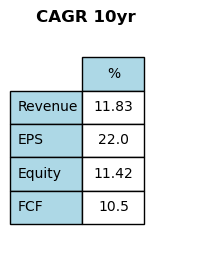

In [221]:
fig, ax =plt.subplots(figsize=(2,3))

ax.axis('tight')
ax.axis('off')
ax.set_title("CAGR 10yr", loc='left', pad='2.0', fontsize=12, weight='bold')

tbl_cagr = ax.table(rowLabels=df_cagr_2.index, 
                        rowColours =["lightblue"] * 10 ,
                        colColours =["lightblue"] * 10 ,  
                        cellText=df_cagr_2.values,
                        cellLoc="center",
                        colLabels='%',
                        loc='center',
                        colWidths=[0.2],
                        )
                       
                        
tbl_cagr.scale(2, 2) # make table a little bit larger



In [199]:
import matplotlib.transforms

In [ ]:
# bounding
tbl_cagr = plt.table(rowLabels=df_cagr_2.index, 
                        rowColours =["lightblue"] * 10 ,
                        colColours =["lightblue"] * 10 ,  
                        cellText=df_cagr_2.values,
                        cellLoc="center",
                        colLabels='%',
                        loc='center',
                       )
                       
                        
plt.axis('off')
plt.grid('off')

#prepare for saving:
# draw canvas once
plt.gcf().canvas.draw()
# get bounding box of table
points = tbl_cagr.get_window_extent(plt.gcf()._cachedRenderer).get_points()
# add 10 pixel spacing
points[0,:] -= 10; points[1,:] += 10
# get new bounding box in inches
nbbox = matplotlib.transforms.Bbox.from_extents(points/plt.gcf().dpi)
# save and clip by new bounding box
# plt.savefig('IMG\test.png', bbox_inches=nbbox, )

plt.show()

# PDF table  
matplotlib pyplot table

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
fx = freeCashFlowGrowth_10yr
type(fx)
fx

In [ ]:

df_fx = pd.DataFrame(fx)
df_fx = df_fx.iloc[:].astype(float).round(2) # select all rows
df_fx


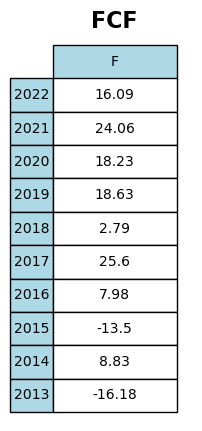

In [249]:
fig, ax =plt.subplots(figsize=(2,5))

ax.axis('tight')
ax.axis('off')
ax.set_title("FCF", fontsize=16, weight='bold')
the_table = ax.table(rowLabels=df_fx.index, 
                        rowColours =["lightblue"] * 10 ,
                        colColours =["lightblue"] * 10 ,  
                        cellText=df_fx.values,
                        cellLoc="center",
                        colLabels=('FCF'),
                        loc='center',
                        colWidths=[0.4])

the_table.scale(2, 2) # make table a little bit larger
plt.savefig('IMG\\fcf10yr.png')

In [ ]:
df_rg = pd.DataFrame(revenueGrowth)
df_rg = df_rg.iloc[:].astype(float).round(2) # select all rows
df_rg

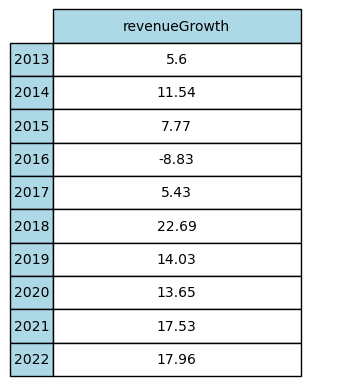

In [256]:
#   REVENUE GROWTH SERIES TO TABLE

fig, ax_RevG =plt.subplots(figsize=(4,4))

ax_RevG.axis('tight')
ax_RevG.axis('off')
# ax.set_title("Table", fontsize=16, weight='bold')
tbl_RevGrowth = ax_RevG.table(rowLabels=df_rg.index, 
                        rowColours =["lightblue"] * 10 ,
                        colColours =["lightblue"] * 10 ,  
                        cellText=df_rg.values,
                        cellLoc="center",
                        colLabels=(  df_rg.columns),
                        loc='center',
                        colWidths=[.4])

tbl_RevGrowth.scale(2, 2) # make table a little bit larger
plt.savefig('IMG\\revenueGrowth10yr.png')
# tbl_RevGrowth

# Series SubPlots

In [250]:
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline


(-0.5, 399.5, 399.5, -0.5)

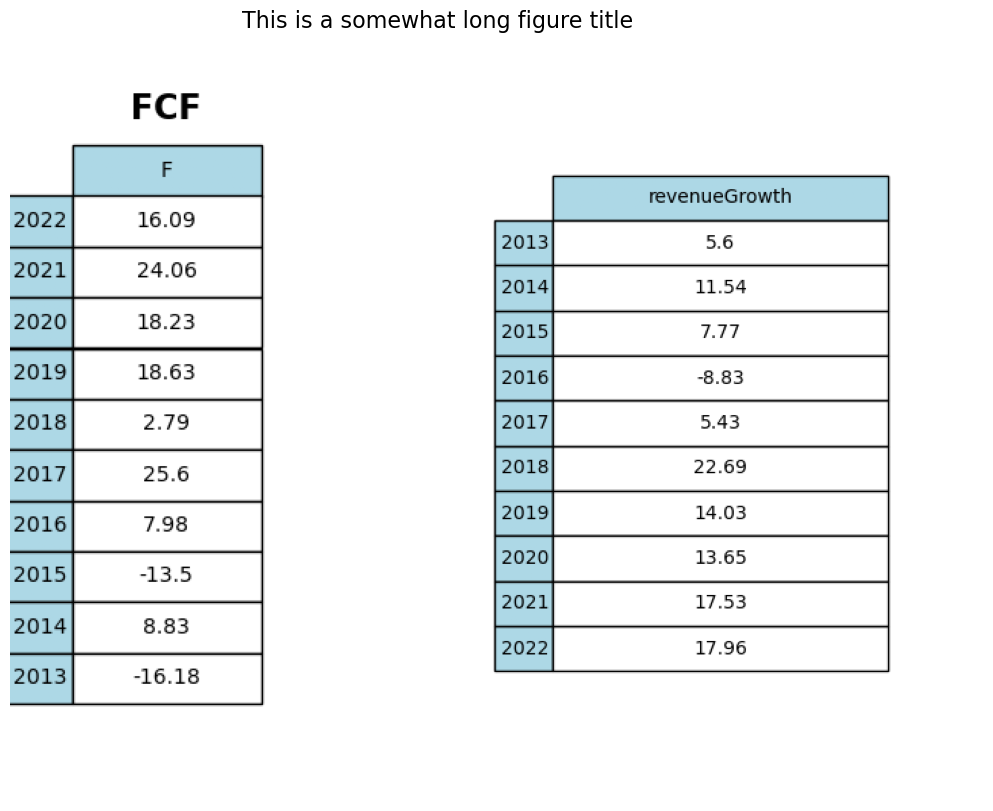

In [285]:

# figure size in inches optional
# rcParams['figure.figsize'] = 11 ,8
# plt.axis('off')

# read images
img_A = mpimg.imread('IMG\\fcf10yr.png')
img_B = mpimg.imread('IMG\\revenueGrowth10yr.png')



# display images : Rows, Columns
fig, ax = plt.subplots(1,2, constrained_layout=True)
fig.suptitle('This is a somewhat long figure title', fontsize=16)

ax[0].axis('off')
ax[0].imshow(img_A)

# ax[0].set_title('subplot 1')
# ax[0].set_xlabel('distance (m)')
# ax[0].set_ylabel('Damped oscillation')


ax[1].imshow(img_B)
ax[1].axis('off')
